<a href="https://colab.research.google.com/github/rishabhk0/Rishabh_ML_AI/blob/main/adult_income_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
assert sys.version_info >= (3,7)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving adult.data to adult.data


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('adult.data', header=None)

In [13]:
df.columns = ['age', 'workclass', 'fnwlgt','education','education_num','martial_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_week','native_country','income' ]

In [21]:
df.head()

,age,workclass,fnwlgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnwlgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   martial_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_week      32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [22]:
X = df[['age','workclass','education','education_num','occupation','race','sex','capital_gain','capital_loss','hours_week','native_country']].values
y = df[['income']]

In [23]:
print(X)

[[39 ' State-gov' ' Bachelors' ... 0 40 ' United-States']
 [50 ' Self-emp-not-inc' ' Bachelors' ... 0 13 ' United-States']
 [38 ' Private' ' HS-grad' ... 0 40 ' United-States']
 ...
 [58 ' Private' ' HS-grad' ... 0 40 ' United-States']
 [22 ' Private' ' HS-grad' ... 0 20 ' United-States']
 [52 ' Self-emp-inc' ' HS-grad' ... 0 40 ' United-States']]


In [37]:
#replace '?' with NaN
df = df.replace('?', np.nan)
cols_with_missing = df.columns[df.isnull().any()].tolist() #identify col with missing values

for col in cols_with_missing: #impute missing values with the mode for each col
  Model_value = df[col].mode()[0]
  df[col]= df[col].fillna(mode_value)

print(df.isnull().sum())# verify that there are no more ? or Nan Values


age               0
workclass         0
fnwlgt            0
education         0
education_num     0
martial_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_week        0
native_country    0
income            0
dtype: int64


In [45]:
categorical_features = ['workclass', 'education','occupation','race','sex','native_country','income']
df_encoded = pd.get_dummies(df, columns= categorical_features)
df_encoded.head()

,age,fnwlgt,education_num,martial_status,relationship,capital_gain,capital_loss,hours_week,workclass_ ?,workclass_ Federal-gov,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,Never-married,Not-in-family,2174,0,40,False,False,...,False,False,False,False,False,True,False,False,True,False
1,50,83311,13,Married-civ-spouse,Husband,0,0,13,False,False,...,False,False,False,False,False,True,False,False,True,False
2,38,215646,9,Divorced,Not-in-family,0,0,40,False,False,...,False,False,False,False,False,True,False,False,True,False
3,53,234721,7,Married-civ-spouse,Husband,0,0,40,False,False,...,False,False,False,False,False,True,False,False,True,False
4,28,338409,13,Married-civ-spouse,Wife,0,0,40,False,False,...,False,False,False,False,False,False,False,False,True,False


In [46]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 99 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   age                                         32561 non-null  int64 
 1   fnwlgt                                      32561 non-null  int64 
 2   education_num                               32561 non-null  int64 
 3   martial_status                              32561 non-null  object
 4   relationship                                32561 non-null  object
 5   capital_gain                                32561 non-null  int64 
 6   capital_loss                                32561 non-null  int64 
 7   hours_week                                  32561 non-null  int64 
 8   workclass_ ?                                32561 non-null  bool  
 9   workclass_ Federal-gov                      32561 non-null  bool  
 10  workclass_ Local-gov  

In [47]:
df_encoded.head()

,age,fnwlgt,education_num,martial_status,relationship,capital_gain,capital_loss,hours_week,workclass_ ?,workclass_ Federal-gov,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,Never-married,Not-in-family,2174,0,40,False,False,...,False,False,False,False,False,True,False,False,True,False
1,50,83311,13,Married-civ-spouse,Husband,0,0,13,False,False,...,False,False,False,False,False,True,False,False,True,False
2,38,215646,9,Divorced,Not-in-family,0,0,40,False,False,...,False,False,False,False,False,True,False,False,True,False
3,53,234721,7,Married-civ-spouse,Husband,0,0,40,False,False,...,False,False,False,False,False,True,False,False,True,False
4,28,338409,13,Married-civ-spouse,Wife,0,0,40,False,False,...,False,False,False,False,False,False,False,False,True,False


In [60]:
X = df_encoded.drop(['income_ <=50K','income_ >50K', 'martial_status', 'relationship'], axis =1)
y = df_encoded['income_ >50K']

In [61]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test,y_test = shuffle(X_test,y_test,random_state=42)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26048, 95)
(6513, 95)
(26048,)
(6513,)


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [65]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
y_pred = model.predict(X_test)

In [67]:
print(y_pred)

[False False  True ... False False False]


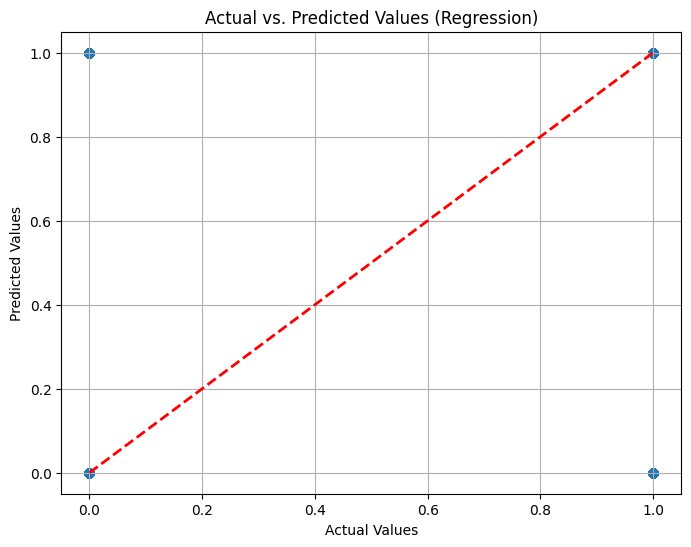

In [69]:

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2) # Diagonal line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values (Regression)")
    plt.grid(True)
    plt.show()

In [70]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.20804544756640564


In [71]:
rmse = np.sqrt(mse)
print(rmse)

0.456119992508995


In [72]:
from sklearn.svm import SVC

In [73]:
model1= SVC()
model1.fit(X_train,y_train)

SVC()

In [74]:
prediction = model1.predict(X_test)

In [75]:
print(prediction)

[False False  True ... False False False]


In [76]:
mse1 = mean_squared_error(y_test,prediction)
print(mse1)

0.2043605097497313


In [77]:
rmse1= np.sqrt(mse)
print(rmse1)

0.456119992508995


In [78]:
from sklearn.metrics import accuracy_score

In [80]:
a_s = accuracy_score(y_test, y_pred)
print(a_s)

0.7919545524335944


In [81]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.7956394902502687


In [82]:
from sklearn.metrics import precision_score, f1_score

In [83]:
p_s = precision_score(y_test, y_pred)
f = f1_score(y_test, y_pred)
print(p_s)
print(f)

0.6578947368421053
0.3991130820399113


In [84]:
from sklearn.metrics import recall_score

In [85]:
r_s = recall_score(y_test, y_pred)
print(r_s)

0.2864417568427753
